<a href="https://colab.research.google.com/github/nicoavilan/Metodos-Numericos/blob/main/Metodo-de-Euler/2D_Bouncing_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pelota rebotando en 2D

Simulación de una pelota rebotando

Se resuelve la ecuación diferencial

$$\frac{d^2y}{dt^2} = - g $$

Entendiéndola como la solución del sistema de ecuaciones acopladas

$$\frac{dy}{dt} = v\qquad \frac{dv}{dt} = -g $$

El método numérico más sencillo que se implementa es el de Euler.

El fenómeno que se simula es la caida de una pelota y el rebote de la misma al llegar al suelo. Se asume que la velocidad con la que la pelota asciende desde el piso es $0.9v$, donde v es la velocidad con la que llega al piso.

Se resuelve la ecuación diferencial con condiciones iniciales

$y(0) = 1$ y $v(0) = 0$.

La condición de rebote de la pelota es
$$ \text{Si } y(t)<0 ⇒ y = -y, \text{ mientras que } v(t) = -0.9v(t) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = int(1.3*10**5)
T = 13
g = 9.8
h = T/(N-1)
x = [0]
y = [1]
v = [0.5]
t = np.linspace(0, T, N)
vx = 12
L = 10

for n in range(N-1):
  X = x[n] + h*vx
  if X < 0:
    x.append(-X)
    vx = - 0.9*vx
  elif X > 10:
    x.append(2*L -X)
    vx = - 0.9*vx
  else:
    x.append(X)
  Y = y[n] + h*v[n]
  if Y < 0: # Evalúa si la pelota llega al piso.
    y.append(-Y)
    v.append(-0.9*(v[n]))
    vx = 0.994*vx # Frenado por fricción
  else:
    y.append(Y)
    v.append(v[n] - h*g)


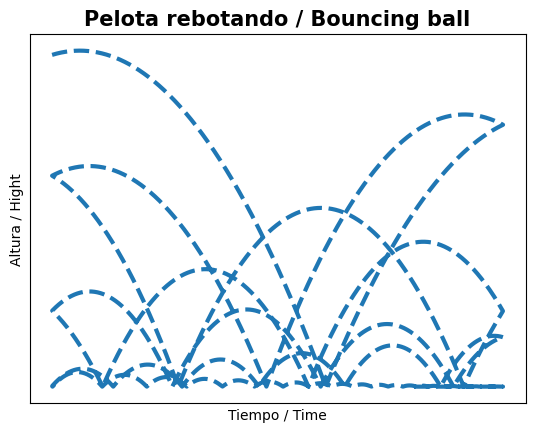

In [5]:
plt.plot(x, y, "--", linewidth = 3)
plt.title("Pelota rebotando / Bouncing ball", weight= "bold", size = 15)
plt.xlabel("Tiempo / Time")
plt.ylabel("Altura / Hight")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
int(1.3*10**5/8)

16250

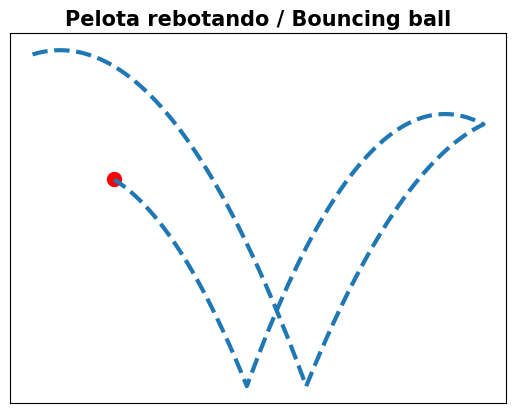

In [8]:
k = int(16*10**3)
plt.plot(x[:k], y[:k], "--", linewidth = 3)
plt.scatter(x[k], y[k], color="red", s = 100)#, linewidth = 3)
plt.title("Pelota rebotando / Bouncing ball", weight= "bold", size = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

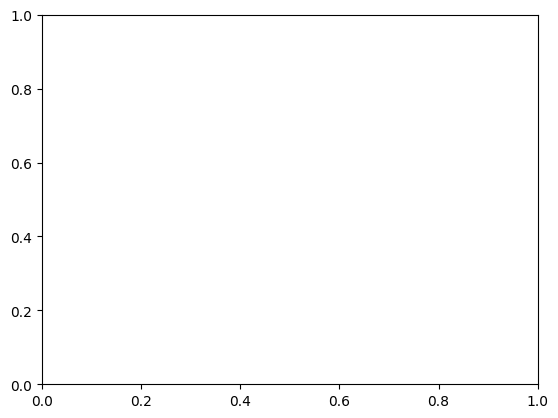

In [11]:
fig=plt.figure()
ax=fig.gca()

def actualizar(i):
  ax.clear()
  ax.plot(x[:i], y[:i],'--', linewidth = 1)
  ax.plot(x[i - 300:i], y[i - 300:i],'--', linewidth = 2, color = "red")
  ax.set_title("Pelota rebotando / Bouncing ball", weight= "bold", size = 15)
  ax.axis(xmin= 0, xmax= 10, ymin= -0.02, ymax= 1.1)
  ax.text(5 , 0.8, f"Tiempo / Time \n{np.round(i*h,2)}", size = 12)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.plot(x[i],  y[i],'o',markersize=10,color='r')

In [12]:
ani=animation.FuncAnimation(fig, actualizar, range(0,N, 50), interval= 20)
HTML(ani.to_html5_video())

<font color="red"> Para ver la animación es necesario compilar el código, github no la genera.</font>